<a href="https://colab.research.google.com/github/sameer-kharel/Multi-class-Classification-Deep-learning-model-/blob/main/Multi_class_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with a multiclass classification

when there is more than two classes as an option it is known as the **Multiclass Classification**

* This means if there are 3 different classes, it is a multi class classification
* It also means if you have 100 different classes it is a multi class classification


To practice the multi class calssification we are going to build a neural network to classify images of the different items of clothing.

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has alrady stored into the training and test set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

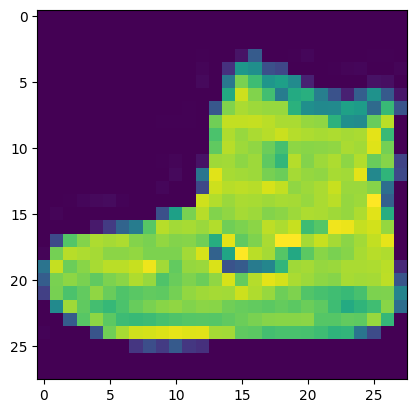

In [ ]:
# pLot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

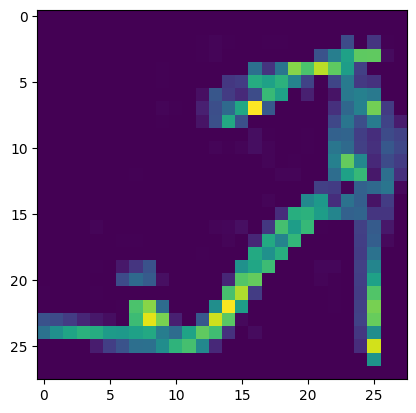

In [ ]:
# pLot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[8])

In [ ]:
# check out the sample label

train_labels[8]

5

The plot is of the ankle boot


In [4]:
 # Create a small list so we can index onto our traininf labels so they ccan be human redable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

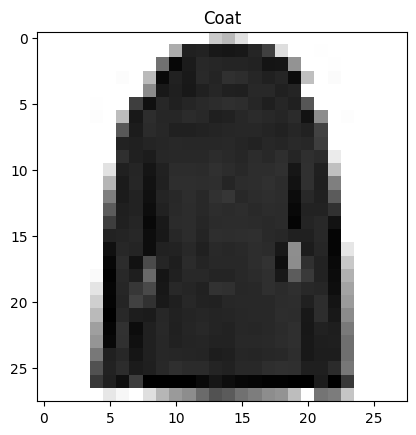

In [ ]:
# plot an example image and its label

# lets create a random choice
index_of_choice = 2000

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])
plt.show()


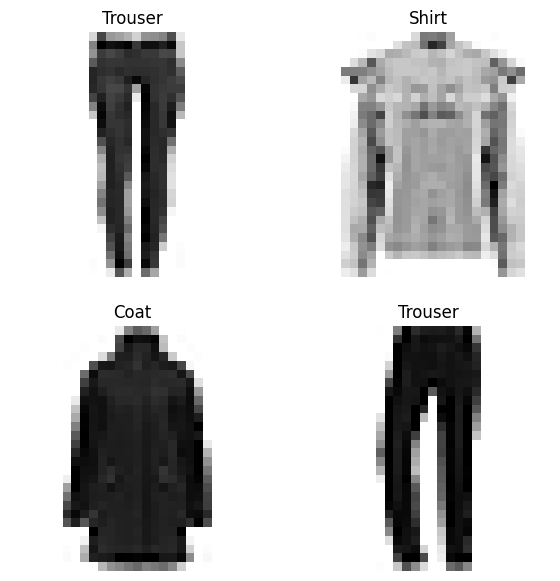

In [ ]:
# PLot the multiple random images of the fashion MINst
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi class classification model

For our multi-class classification model we can use a similar architecture to our binary classifiers, however, we are going to have to tweak a few things:

* Input shape = 28 * 28 ( the shape of the one image)
* output shape = 10 ( one per class of clothing)
* Loss function = tf.keras.loss.CategoricalCrossentropy
  * If your labesl are one hot encoded use the SparseCategoricalCrossentropy
  * If your labels are integer form use SparseCategoricalCrossentropy

* Output layer activation = softmax(not sigmoid)

In [ ]:
# set the random seed
tf.random.set_seed(1)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels))

Epoch 1/10


ValueError: ignored

In [5]:
 # our data needs to be flattende (from 20*28 to none, 784)
 flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
 flatten_model.output_shape


(None, 784)

In [ ]:
# set the random seed
tf.random.set_seed(1)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Flattend the data
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Use the Sparse categoricalCrossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3477 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# check the model summary

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural network prefer data to be scaled ( or noramalized), this means they like to have the numbers in the tensors they try to find the patterns between 0 and 1.

In [9]:
# We can get the training and testing data between 0 and 1 by dividing by the maximun

train_data_new = train_data / 255.0
test_data_new = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_new.min(), train_data_new.max()

(0.0, 1.0)

In [ ]:
# Now our data is noramlized, let's build a model on the noramalized data and find the patterns in it>

# set the random seed
tf.random.set_seed(1)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
norm_history_2 = model_2.fit(train_data_new,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data_new, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0202 - accuracy: 0.6583 - val_loss: 0.7500 - val_accuracy: 0.7447
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6731 - accuracy: 0.7709 - val_loss: 0.6529 - val_accuracy: 0.7769
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6007 - accuracy: 0.7917 - val_loss: 0.6239 - val_accuracy: 0.7830
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5692 - accuracy: 0.8000 - val_loss: 0.5918 - val_accuracy: 0.7930
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5504 - accuracy: 0.8083 - val_loss: 0.5719 - val_accuracy: 0.8045
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5385 - accuracy: 0.8113 - val_loss: 0.5636 - val_accuracy: 0.8036
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5290 - accuracy: 0.8143 - val_loss: 0.5878 - val_accuracy:

## NOte : Neural networks tend to prefer data in numerical form as well as the scaled/normalized ( number between 0 and 1) this will imporve the model.

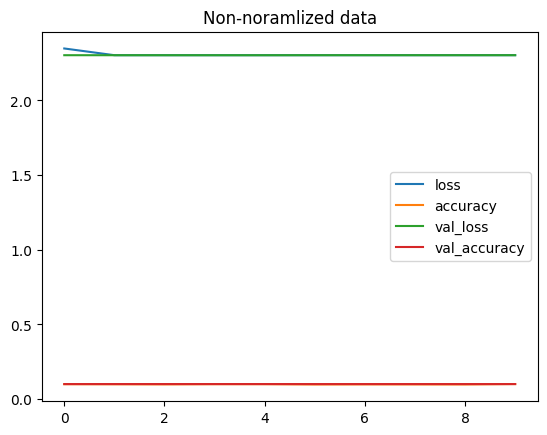

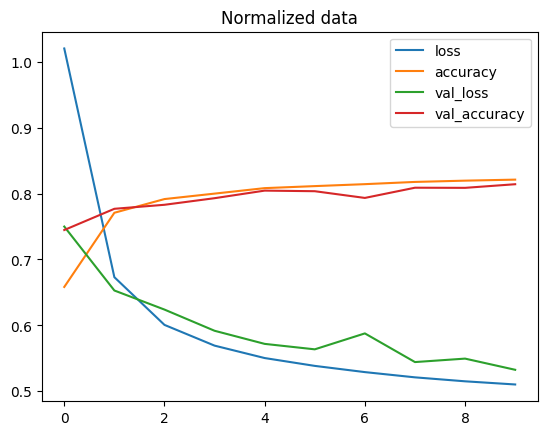

In [ ]:
import pandas as pd

# Plot the non_normalaized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-noramlized data")

# Plot the normalized data loss curves
pd.DataFrame(norm_history_2.history).plot(title="Normalized data");

> When comparing the results the same model with even *sightly* different data can produce *dramatically* different results. so when comparing model's it's important to make sure you are comparing them on the same criterial ( eg. same architecture but the different data or same data but the different architecture).

## Finding the ideal learning rate

In [ ]:
# ser the random seed
tf.random.set_seed(1)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_3.fit(train_data_new,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_new, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 2ms/step - loss: 1.1031 - accuracy: 0.5772 - val_loss: 0.8089 - val_accuracy: 0.7043 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7252 - accuracy: 0.7296 - val_loss: 0.6903 - val_accuracy: 0.7487 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6546 - accuracy: 0.7637 - val_loss: 0.6507 - val_accuracy: 0.7743 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6158 - accuracy: 0.7857 - val_loss: 0.6220 - val_accuracy: 0.7863 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5897 - accuracy: 0.7955 - val_loss: 0.6080 - val_accuracy: 0.7898 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5666 - accuracy: 0.8030 - val_loss: 0.5870 - val_accuracy: 0.7975 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

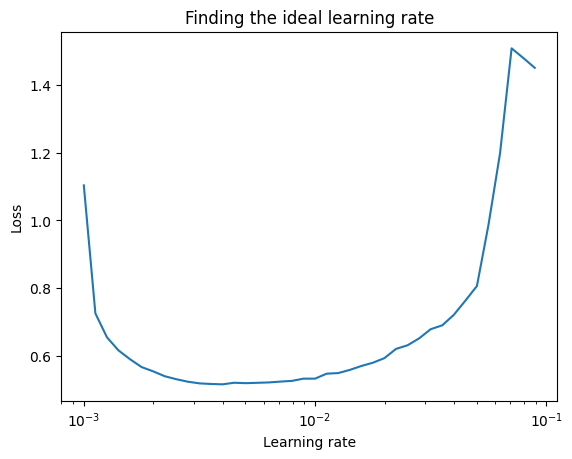

In [ ]:
# Plot the learning rate decay curve

import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [10]:
# Let's refit a model with the ideal learning rate

# set the random seed
tf.random.set_seed(1)

# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])

# Compile the model

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model


history_4 = model_4.fit(train_data_new,
                        train_labels,
                        epochs=40,
                        validation_data=(test_data_new, test_labels))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0934 - accuracy: 0.6050 - val_loss: 0.7179 - val_accuracy: 0.7554
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6394 - accuracy: 0.7847 - val_loss: 0.6316 - val_accuracy: 0.7877
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5937 - accuracy: 0.8000 - val_loss: 0.6077 - val_accuracy: 0.7957
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5691 - accuracy: 0.8080 - val_loss: 0.5855 - val_accuracy: 0.8005
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5513 - accuracy: 0.8139 - val_loss: 0.5809 - val_accuracy: 0.8029
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5390 - accuracy: 0.8168 - val_loss: 0.5676 - val_accuracy: 0.8100
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5290 - accuracy: 0.8198 - val_loss: 0.5736 - val_accuracy:

## Evaluating our multi class classification model


To evaluate our multi class classification model we could :

* Evaluate its performance using other classsification metrics ( such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results ( by training it for longer or changing the architecture)
* save and export it for use in an application

In [27]:
# Create a confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set the labels to classes
  if classes:
      labels = classes
  else:
      labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(
      title="Confusion matrix",
      xlabel="Predicted label",
      ylabel="True label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels,
  )

  # set the x-axis labels to bottom

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.0

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(
          j,
          i,
          f"{cm[i, j]} ({cm_norm[i, j]*100:.2f}%)",  # Corrected format specifier
          horizontalalignment="center",
          color="white" if cm[i, j] > threshold else "black",
          size=text_size)


In [6]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
# Make some prediction with our model
y_probs = model_4.predict(test_data_new) # Probs is the short form of the " prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[2.3383045e-06, 2.4341654e-05, 1.1785030e-07, 1.8357893e-09,
        2.8199861e-11, 5.2120253e-02, 6.3395639e-10, 1.4629173e-01,
        2.5076540e-06, 8.0155867e-01],
       [1.1016245e-04, 1.1630286e-07, 8.8013548e-01, 6.5349928e-07,
        5.7335254e-02, 7.5668839e-11, 6.2418066e-02, 3.6046512e-15,
        3.3002368e-07, 1.7086471e-27],
       [2.4130713e-06, 9.9795085e-01, 1.3171374e-03, 2.4415263e-05,
        4.3586057e-05, 2.4879412e-09, 8.2180202e-07, 6.6077150e-04,
        2.0191990e-11, 2.6156776e-13],
       [6.3350194e-06, 9.9713433e-01, 1.9301703e-03, 7.3510957e-05,
        8.6551845e-05, 8.5417522e-09, 2.1085468e-06, 7.6699408e-04,
        1.0486223e-10, 1.7642649e-12],
       [1.5855050e-01, 2.7499826e-05, 2.3277219e-01, 1.3374006e-02,
        2.0423837e-02, 3.6716068e-07, 5.7342118e-01, 5.0941642e-12,
        1.4303437e-03, 5.4971103e-14]], dtype=float32)

Note : Remember to make the prediction on the same kind of the data the model is trainied on ( eg: if the model is trained on the normalized data the predictions should be on the normalized data)


In [18]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.3383045e-06, 2.4341654e-05, 1.1785030e-07, 1.8357893e-09,
        2.8199861e-11, 5.2120253e-02, 6.3395639e-10, 1.4629173e-01,
        2.5076540e-06, 8.0155867e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [15]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
# Convert all the prediction probabilities into the integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [20]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[791,   4,  25,  80,   3,   1,  85,   0,  11,   0],
       [  0, 949,  10,  36,   2,   0,   1,   1,   1,   0],
       [ 31,   9, 746,  19, 117,   0,  76,   0,   2,   0],
       [ 51,  20,  12, 842,  28,   1,  43,   0,   3,   0],
       [  1,   5, 185,  40, 699,   1,  66,   0,   3,   0],
       [  3,   0,   0,   1,   0, 872,   1,  72,   4,  47],
       [175,   4, 144,  56, 119,   0, 486,   0,  16,   0],
       [  0,   0,   0,   0,   0,  16,   0, 937,   0,  47],
       [  2,   1,   1,  20,  16,  10,  60,   4, 886,   0],
       [  0,   0,   0,   0,   0,  14,   1,  38,   0, 947]])

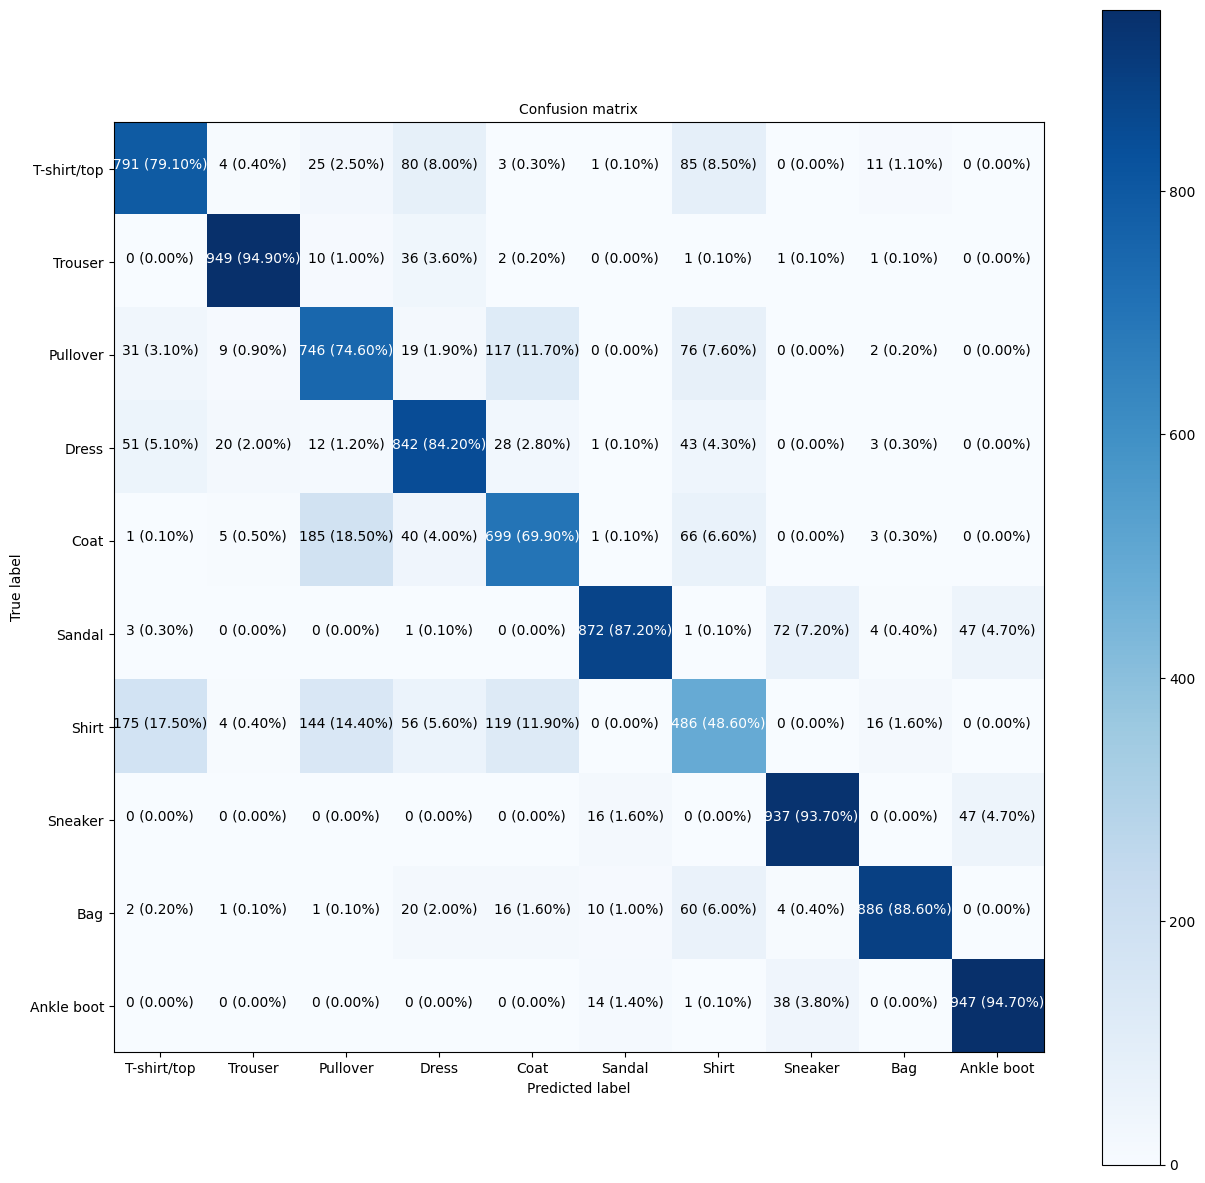

In [28]:
 # Make a prettier confusuion matrix
 make_confusion_matrix(y_true=test_labels,
                       y_pred=y_preds,
                       classes=class_names,
                       figsize=(15, 15),
                       text_size=10)

**NOte:** Often when working with images and other forms of visual data, it is good idea to visualize as much as possible to develop a further understanding of the data and the inpute and outputs of your models.

let's create a function for:

* Plot a random image
* make a prediction on said image
* Label the plot with the truth label and the predicted label

In [30]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plot it and labels it with a prediction and truth label.
  """
  # set up the random integer
  i = random.randint(0, len(images))

  # Create prediction and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prdiction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # add xlabel information (prediction/true label)
  plt.xlabel("Pred : {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
             color=color) # set the color to green or red based on the prediction

1/1 [==============================] - 0s 20ms/step


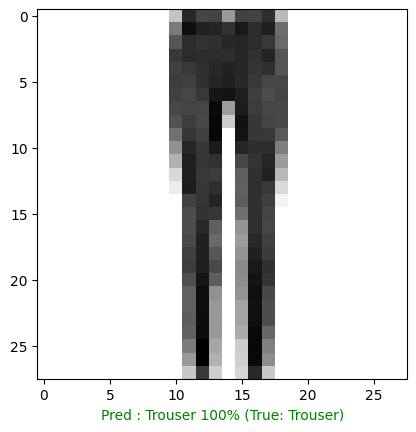

In [37]:
# Check out a radom image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data_new, # always make the prediction on the same type of data that the model is trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is the model learning?

In [38]:
# Find the layers of our most recent model
model_4.layers

In [39]:
# Extract a particular layer
model_4.layers[1]

In [41]:
# get the patterns of a layer in our network
weigths, biases = model_4.layers[1].get_weights()

# Shapes
weigths, weigths.shape

(array([[ 1.175412  ,  1.7364572 , -0.8551987 ,  0.0707491 ],
        [-1.5762066 , -1.2470242 ,  1.6543733 ,  1.416361  ],
        [ 0.673604  , -0.9221984 ,  0.80857134,  1.1226145 ],
        ...,
        [ 0.27356875,  0.03405352,  0.56250745, -0.36127588],
        [-0.7342836 , -0.10934633,  0.22914438,  0.33874175],
        [ 0.5486911 , -0.19927612, -1.0157381 , -0.31702158]],
       dtype=float32),
 (784, 4))

In [43]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector


In [44]:
# Bias and biases shaoes
biases, biases.shape

(array([2.7187362, 1.9111118, 1.6415083, 2.3771641], dtype=float32), (4,))

Every neuron has a bias vector.Each of these is paired with a weights matrix.

The bias vector get intiatalized as zeros ( at least in the case of a TensorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

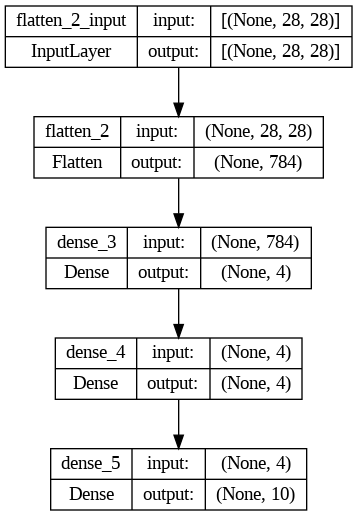

In [45]:
# let's check out the another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)